# Data Cleaning Notebook

In this notebook, we explore and clean our initial dataset. We have a dataframe containing meausrements of coral reef cover off of several coasts in the U.S. Virgin islands. The areas are divided into quadrats (areas subdivided into squares) and then are measured by the proportion of the seafloor that is covered in each coral species. 

### Holding Data for Model Evaluation
We plan to tuck away the data from the most recent couple of years and use that as a testing dataset after our model has been trained and optimized. Unfortunately this data will not be independent of the years before (e.g. 2020 coral reef cover is expected to depend on the cover from 2019). However, we care about predicting coral cover in future years, so splitting our data by time will make the most sense for the goal of our project.

In [90]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [91]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 

In [92]:
df #print and look at the data set 

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB
Date,,,,,,
1987/12/01,Tektite,1,T1Q1,16.5,3.5,6
1987/12/01,Tektite,1,T1Q2,10,6,74
1987/12/01,Tektite,1,T1Q3,13.5,3.5,45
1987/12/01,Tektite,1,T1Q4,15.5,6.5,61.5
1987/12/01,Tektite,1,T1Q5,19,4,48
...,...,...,...,...,...,...
2021/07/01,Yawzi,nd,6,0.0,30.0,50.0
2021/07/01,Yawzi,nd,7,0.0,28.5,45.5
2021/07/01,Yawzi,nd,8,0.5,35.0,35.0


In [93]:
print(df['percentCover_CTB'].unique()) #check the unique values of the column

['6' '74' '45' '61.5' '48' '10' '3' '29' '38' '30.5' '31.5' '26' '24'
 '11.5' '14.5' '19' '15.5' '22' '16' '19.3' '31' '39' '30' '19.5' '20.5'
 '44.5' '63' '39.5' '46' '62' '6.8' '38.5' '32.5' '21' '36.5' '25.5'
 '10.5' '18' '12.5' '24.5' '32' '14' '25' '33.5' '40.5' '29.8' '33' '41'
 '9' '34.5' '23' '27.5' '29.5' '7.5' '7' '26.5' '22.5' '16.5' '12' '17'
 '16.1' '17.5' '35.5' '50' '37.5' '27' '18.5' '9.5' '37' '41.5' '51'
 '49.5' '20' '42.5' '21.5' '43.5' '40' '28.5' '28' '23.5' '6.5' '15' '11'
 '34' '8.5' '8' '13' '13.5' '36' '30.3' '32.3' '25.6' '30.9' '17.2' '28.8'
 '5.3' '15.1' '15.6' '25.9' '22.6' '8.9' '10.3' '7.6' '8.7' '8.8' '7.3'
 '5.6' '0' '1.6' '25.3' '40.7' '3.2' '4.5' '2.5' '3.5' '5' '18.7' '18.8'
 '20.8' '8.1' '2.6' '12.3' '14.9' '14.1' '2.7' '15.9' '12.8' '15.7' '6.6'
 '13.8' '1.1' '2.2' '33.2' '23.7' '31.4' '26.2' '1' '7.4' '18.6' '4' '1.5'
 '5.5' '22.3' '11.1' '12.2' '11.2' '24.7' '8.2' '4.1' '7.7' '14.3' '9.7'
 '10.2' '10.7' '5.1' '22.7' '17.9' '2' '9.9' '36.2' '30.8'

In [94]:
print(len(df)) #print the amount of rows of the dataset
#check and print the amount of times there is no data given in the entry for our three main columns
specific_value_count = df['percentCover_CTB'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_macroalgae'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_allCoral'].value_counts()['nd']
print(specific_value_count)


2283
19
19
9


Based on the previous numbers we can drop all of the rows who have "nd" as the value in our main three columns without losing a bunch of data. 

In [95]:
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
print(len(df))

2264


This leaves us with 2,264 individual rows of data to work with.

In [96]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral

In [97]:
# convert the date column to date time objects
df.index = pd.to_datetime(df.index)

In [98]:
df #print the dataset with the new feature

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


Plot percentage of coral coverage

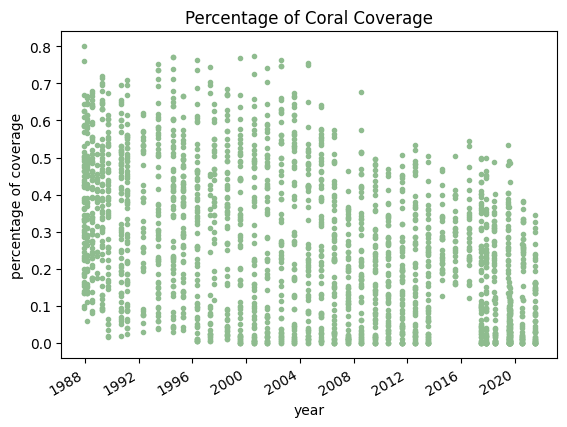

In [99]:
df.plot(y = "percentCover_allCoral", linestyle = 'None', marker = '.', color = 'darkseagreen', title = 'Percentage of Coral Coverage', ylabel='percentage of coverage', xlabel = 'year',legend=False)
plt.show()

In this plot we can see all the data points of coral reef coverage. While there are seom small outliers, there doesn't appear to be anything extreme enough that we would need to drop that data point.

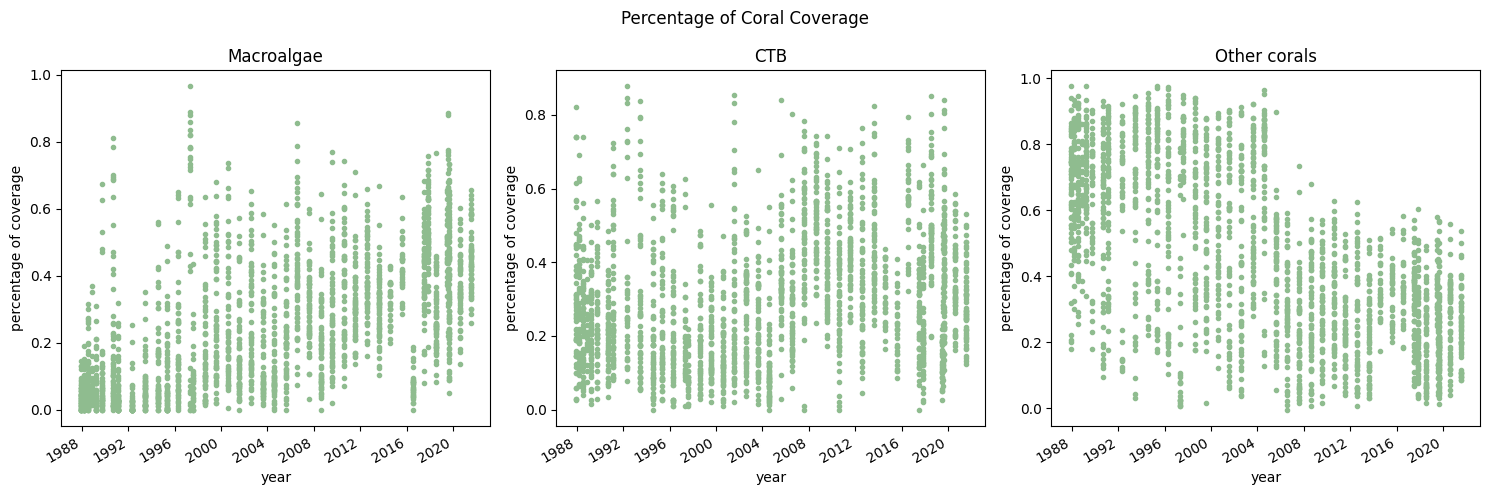

In [100]:
#plot coral 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))
df.plot(ax = ax1,y = ["percentCover_macroalgae"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'Macroalgae', ylabel='percentage of coverage', xlabel = 'year',legend=False)

df.plot(ax = ax2,y = [ "percentCover_CTB"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'CTB', ylabel='percentage of coverage', xlabel = 'year',legend=False)

df.plot(ax = ax3,y = ["percentCover_other"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'Other corals', ylabel='percentage of coverage', xlabel = 'year',legend=False)

fig.suptitle("Percentage of Coral Coverage")
fig.tight_layout()
plt.show()

Plot histogram of difference in average coral coverage each year

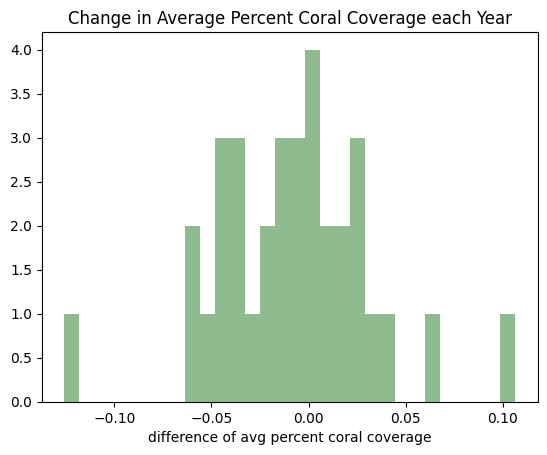

In [101]:
years = np.arange(1987,2022,1)
difference = []
for i in range(len(years)-1,0,-1):
    curr = df.loc[str(years[i])]
    past = df.loc[str(years[i-1])]
    difference.append(curr["percentCover_allCoral"].mean() - past["percentCover_allCoral"].mean())

plt.hist(difference,bins = 30, color = "darkseagreen")
plt.title("Change in Average Percent Coral Coverage each Year")
plt.xlabel("difference of avg percent coral coverage")
plt.show()

We see from the histogram that the change in coral reef cover tends to stay near zero from year to year. This supports our assumption that the cover will depend on previous years. We also see there is slightly more years with negative growth, further supporting our concern that coral reefs are getting smaller over time.

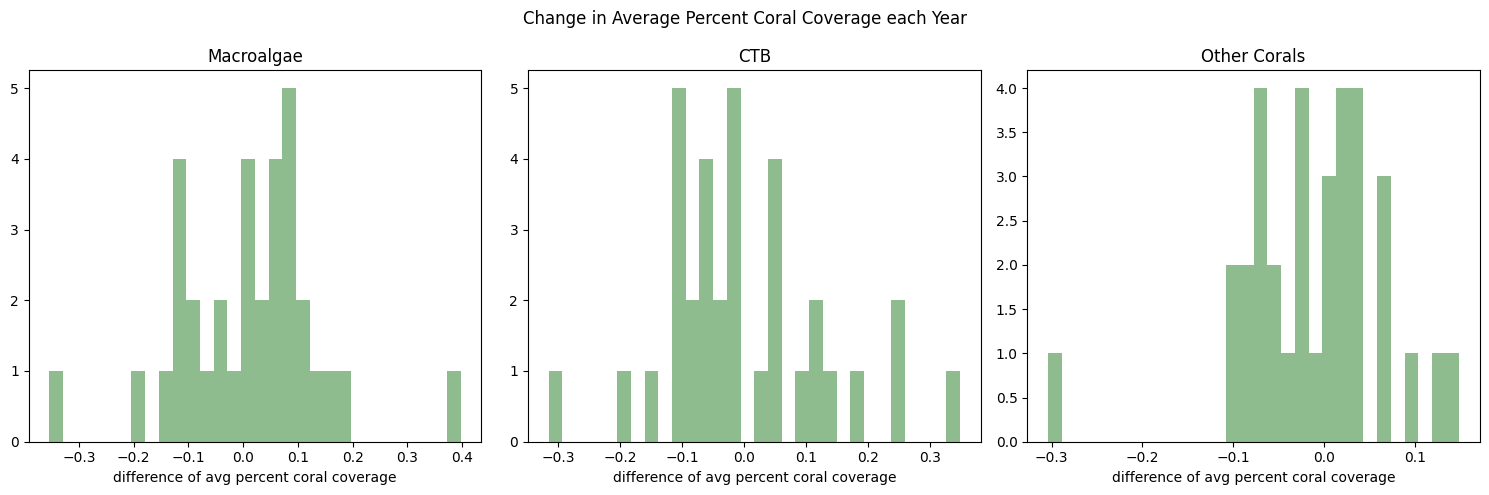

In [102]:
years = np.arange(1987,2022,1)

#initialize lists for changes in specific types of coral
difference_marco = []
difference_ctb = []
difference_other = []

#calculate the differences from year to year for each coral species
for i in range(len(years)-1,0,-1):
    curr = df.loc[str(years[i])]
    past = df.loc[str(years[i-1])]
    
    difference_marco.append(curr["percentCover_macroalgae"].mean() - past["percentCover_macroalgae"].mean())
    difference_ctb.append(curr["percentCover_CTB"].mean() - past["percentCover_CTB"].mean())
    difference_other.append(curr["percentCover_other"].mean() - past["percentCover_other"].mean())

#plot the percent change in coral reef coverage
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(difference_marco,bins = 30, color = "darkseagreen")
plt.title("Macroalgae")
plt.xlabel("difference of avg percent coral coverage")

plt.subplot(132)
plt.hist(difference_ctb,bins = 30, color = "darkseagreen")
plt.title("CTB")
plt.xlabel("difference of avg percent coral coverage")

plt.subplot(133)
plt.hist(difference_other,bins = 30, color = "darkseagreen")
plt.title("Other Corals")
plt.xlabel("difference of avg percent coral coverage")

plt.suptitle("Change in Average Percent Coral Coverage each Year")
plt.tight_layout()
plt.show()

In [103]:
explore_df = df[df['site'] == 'Tektite']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
explore_df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1988-03-01,Tektite,1,T1Q1,0.195,0.005,0.445,0.550
1988-07-01,Tektite,1,T1Q1,0.255,0.175,0.335,0.490
1989-04-01,Tektite,1,T1Q1,0.310,0.090,0.300,0.610
1989-10-01,Tektite,1,T1Q1,0.245,0.065,0.415,0.520
1990-09-01,Tektite,1,T1Q1,0.310,0.280,0.160,0.560
1991-03-01,Tektite,1,T1Q1,0.215,0.025,0.330,0.645
1993-06-01,Tektite,1,T1Q1,0.163,0.062,0.303,0.635
1994-08-01,Tektite,1,T1Q1,0.226,0.037,0.125,0.838


In [104]:
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])
print(percent_cover_all_coral)

[0.165 0.195 0.255 0.31  0.245 0.31  0.215 0.163 0.226 0.29  0.385 0.325
 0.337 0.279 0.221 0.361 0.387 0.389 0.386 0.387 0.224 0.138 0.219 0.264
 0.284 0.197 0.253 0.25  0.215 0.235 0.23  0.41  0.227 0.242 0.308 0.281
 0.161]


In [105]:
def sm_arma(array, p_max=3, q_max=3, n=10):
    """
    Build an ARMA model with statsmodel and
    predict future n values.

    Parameters:
        filename (str): data filename
        p_max (int): maximum order of autoregressive model
        q_max (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    z = np.diff(array)
    
    best_aic = np.inf #set our values 
    best_model = None
    best_p = None
    best_q = None
    best_std = None
    for p in range(1,p_max+1): #iterate through p and q 
        for q in range(1,q_max+1):
            model = ARIMA(z,order=(p,0,q),trend='c').fit(method='innovations_mle') #set the model and then check if best
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_p = p
                best_q = q
                best_std = model.resid
    
    
    final = best_model.predict(start=0,end=len(z)+n) #return desired value after prediciton
    return best_aic,final,np.std(best_std)

In [106]:
aic, final,std = sm_arma(percent_cover_all_coral)

In [107]:
z = np.diff(percent_cover_all_coral)

In [108]:
print(len(z))
print(z)
print(len(final))
print(final)

36
[ 0.03   0.06   0.055 -0.065  0.065 -0.095 -0.052  0.063  0.064  0.095
 -0.06   0.012 -0.058 -0.058  0.14   0.026  0.002 -0.003  0.001 -0.163
 -0.086  0.081  0.045  0.02  -0.087  0.056 -0.003 -0.035  0.02  -0.005
  0.18  -0.183  0.015  0.066 -0.027 -0.12 ]
47
[-1.34488735e-04 -8.14832698e-03 -2.58161958e-02 -4.11108173e-02
 -1.01444411e-02 -3.51044411e-02  8.51466974e-03  2.99003789e-02
 -6.02972483e-04 -2.92209732e-02 -7.00853446e-02 -3.75116528e-02
 -4.06112623e-02 -1.09375694e-02  1.70314778e-02 -5.05782798e-02
 -6.03965365e-02 -5.83741375e-02 -5.41827431e-02 -5.22502072e-02
  2.95073990e-02  7.03154551e-02  2.75938497e-02  4.26379735e-03
 -5.85712055e-03  3.74211857e-02  8.21083814e-03  9.35821697e-03
  2.64601270e-02  1.55477626e-02  1.75083730e-02 -7.34869262e-02
  2.06235054e-02  1.24166458e-02 -2.13007607e-02 -7.16269243e-03
  5.36791961e-02  2.50572290e-02  1.16584714e-02  5.38613161e-03
  2.44987080e-03  1.07532353e-03  4.31858824e-04  1.30634679e-04
 -1.03769183e-05 -7.63

In [109]:
# time = np.arange(1987,2022,1)
# time2 = np.arange(1987,2022+10,1)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
print(len(time))
print(time)
print(len(time2))
print(time2)

36
[1987.         1987.97142857 1988.94285714 1989.91428571 1990.88571429
 1991.85714286 1992.82857143 1993.8        1994.77142857 1995.74285714
 1996.71428571 1997.68571429 1998.65714286 1999.62857143 2000.6
 2001.57142857 2002.54285714 2003.51428571 2004.48571429 2005.45714286
 2006.42857143 2007.4        2008.37142857 2009.34285714 2010.31428571
 2011.28571429 2012.25714286 2013.22857143 2014.2        2015.17142857
 2016.14285714 2017.11428571 2018.08571429 2019.05714286 2020.02857143
 2021.        ]
47
[1987.         1987.95652174 1988.91304348 1989.86956522 1990.82608696
 1991.7826087  1992.73913043 1993.69565217 1994.65217391 1995.60869565
 1996.56521739 1997.52173913 1998.47826087 1999.43478261 2000.39130435
 2001.34782609 2002.30434783 2003.26086957 2004.2173913  2005.17391304
 2006.13043478 2007.08695652 2008.04347826 2009.         2009.95652174
 2010.91304348 2011.86956522 2012.82608696 2013.7826087  2014.73913043
 2015.69565217 2016.65217391 2017.60869565 2018.56521739 2019.

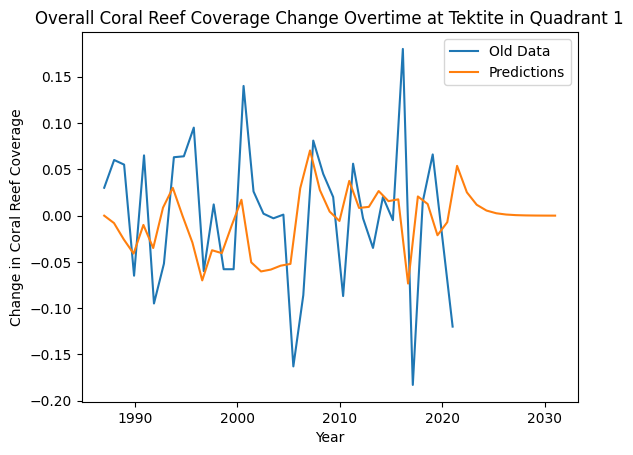

In [44]:
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
# plt.plot(time2[-10:],final[-10:]*2*std,label='Confidence Interval')
# plt.plot(time2[-10:],final[-10:]*-2*std,label='Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Tektite in Quadrant 1')
plt.legend()
plt.show()

In [45]:
explore_df = df[df['site'] == 'Yawzi']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
explore_df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Yawzi,1,T1Q1,0.570,0.005,0.215,0.780
1988-03-01,Yawzi,1,T1Q1,0.490,0.000,0.250,0.750
1988-07-01,Yawzi,1,T1Q1,0.440,0.005,0.290,0.705
1989-04-01,Yawzi,1,T1Q1,0.480,0.035,0.235,0.730
1989-10-01,Yawzi,1,T1Q1,0.510,0.040,0.145,0.815
1990-09-01,Yawzi,1,T1Q1,0.520,0.085,0.075,0.840
1991-03-01,Yawzi,1,T1Q1,0.450,0.000,0.085,0.915
1992-05-01,Yawzi,1,T1Q1,0.517,0.000,0.189,0.811
1993-06-01,Yawzi,1,T1Q1,0.648,0.075,0.140,0.785


In [46]:
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])
print(percent_cover_all_coral)

[0.57  0.49  0.44  0.48  0.51  0.52  0.45  0.517 0.648 0.544 0.374 0.687
 0.745 0.616 0.32  0.603 0.589 0.539 0.601 0.417 0.441 0.4   0.368 0.324
 0.356 0.459 0.452 0.452 0.335 0.49  0.485 0.051 0.5   0.444]


In [47]:
aic, final,std = sm_arma(percent_cover_all_coral)

In [48]:
z = np.diff(percent_cover_all_coral)

In [49]:
print(len(z))
print(z)
print(len(final))
print(final)

33
[-0.08  -0.05   0.04   0.03   0.01  -0.07   0.067  0.131 -0.104 -0.17
  0.313  0.058 -0.129 -0.296  0.283 -0.014 -0.05   0.062 -0.184  0.024
 -0.041 -0.032 -0.044  0.032  0.103 -0.007  0.    -0.117  0.155 -0.005
 -0.434  0.449 -0.056]
44
[-0.00457586  0.02432928  0.06623698  0.01681209 -0.04101648 -0.05241812
  0.01643183 -0.02309803 -0.16001424 -0.0699738   0.14091613 -0.11327093
 -0.26007094 -0.07289419  0.25548244  0.0326856  -0.10434916 -0.01874656
 -0.04774091  0.0908686   0.10567232  0.07515865  0.07952902  0.08796979
  0.03474601 -0.0884384  -0.09795479 -0.05995054  0.05587018 -0.0532246
 -0.1030294   0.29805705 -0.01995313 -0.17326996  0.063937    0.05239955
 -0.05059325 -0.01764705  0.01953459 -0.00523348 -0.01518332 -0.00142002
 -0.0006824  -0.00703788]


In [50]:
# time = np.arange(1987,2022,1)
# time2 = np.arange(1987,2022+10,1)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
print(len(time))
print(time)
print(len(time2))
print(time2)

33
[1987.     1988.0625 1989.125  1990.1875 1991.25   1992.3125 1993.375
 1994.4375 1995.5    1996.5625 1997.625  1998.6875 1999.75   2000.8125
 2001.875  2002.9375 2004.     2005.0625 2006.125  2007.1875 2008.25
 2009.3125 2010.375  2011.4375 2012.5    2013.5625 2014.625  2015.6875
 2016.75   2017.8125 2018.875  2019.9375 2021.    ]
44
[1987.         1988.02325581 1989.04651163 1990.06976744 1991.09302326
 1992.11627907 1993.13953488 1994.1627907  1995.18604651 1996.20930233
 1997.23255814 1998.25581395 1999.27906977 2000.30232558 2001.3255814
 2002.34883721 2003.37209302 2004.39534884 2005.41860465 2006.44186047
 2007.46511628 2008.48837209 2009.51162791 2010.53488372 2011.55813953
 2012.58139535 2013.60465116 2014.62790698 2015.65116279 2016.6744186
 2017.69767442 2018.72093023 2019.74418605 2020.76744186 2021.79069767
 2022.81395349 2023.8372093  2024.86046512 2025.88372093 2026.90697674
 2027.93023256 2028.95348837 2029.97674419 2031.        ]


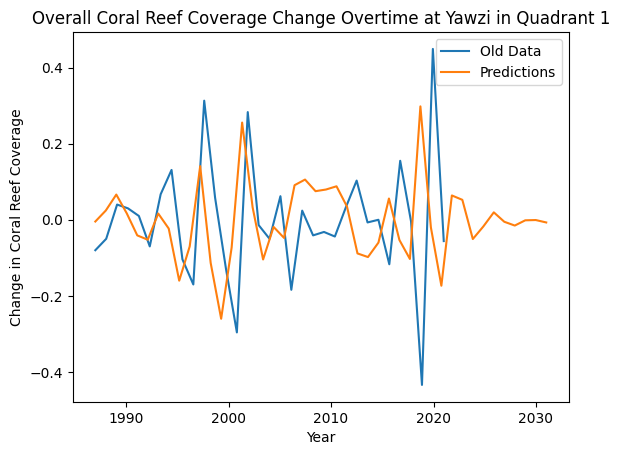

In [51]:
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Yawzi in Quadrant 1')
plt.legend()
plt.show()

A deeper look into data from 2012

In [26]:
#look at 2012
df_12 = df.loc['2012']
df_12

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
2012-08-01,Tektite,1,T1Q1,0.253,0.348,0.328,0.324
2012-08-01,Tektite,1,T1Q2,0.216,0.276,0.427,0.297
2012-08-01,Tektite,1,T1Q3,0.271,0.347,0.231,0.422
2012-08-01,Tektite,1,T1Q4,0.095,0.322,0.548,0.130
2012-08-01,Tektite,1,T1Q5,0.345,0.380,0.245,0.375
2012-08-01,Tektite,1,T1Q6,0.205,0.260,0.490,0.250
2012-08-01,Tektite,1,T1Q7,0.212,0.318,0.460,0.222
2012-08-01,Tektite,1,T1Q8,0.171,0.372,0.432,0.196
2012-08-01,Tektite,1,T1Q9,0.381,0.310,0.218,0.472


Finding average over quadrants

In [110]:
df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


In [111]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [112]:
df['year_column'] = df.index.year
df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other,year_column
Date,,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905,1987
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200,1987
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515,1987
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320,1987
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480,1987
...,...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200,2021
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260,2021
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300,2021


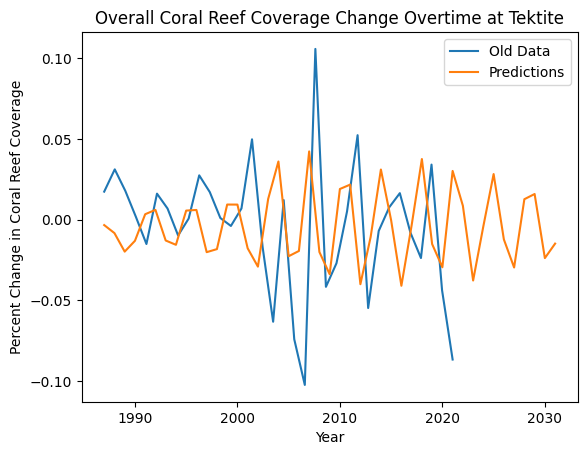

In [113]:
df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()
aic, final,std = sm_arma(avg_percent_cover_allcoral_tektite)
z = np.diff(avg_percent_cover_allcoral_tektite)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percent Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Tektite')
plt.legend()
plt.show()

In [114]:
avg_percent_cover_allcoral_tektite_prediction = np.array([np.sum(final[:i]) for i in range(len(final))])
avg_percent_cover_allcoral_tektite_prediction += np.mean(avg_percent_cover_allcoral_tektite.iloc[:5])
print(avg_percent_cover_allcoral_tektite_prediction)

[0.36229726 0.35893842 0.35060451 0.33079713 0.3176874  0.32106111
 0.32713903 0.3142278  0.29864262 0.30426879 0.31028745 0.29014455
 0.27189344 0.28126685 0.29061048 0.27286049 0.24374652 0.25658935
 0.29265615 0.26999669 0.2505946  0.29289496 0.27283683 0.23903216
 0.25804377 0.2797686  0.23976714 0.22903824 0.26013433 0.25973636
 0.21877271 0.21526882 0.25284276 0.23771549 0.2082041  0.23842318
 0.24705575 0.20935466 0.20533173 0.23361293 0.22135952 0.19170534
 0.20438692 0.22028419 0.19645699]


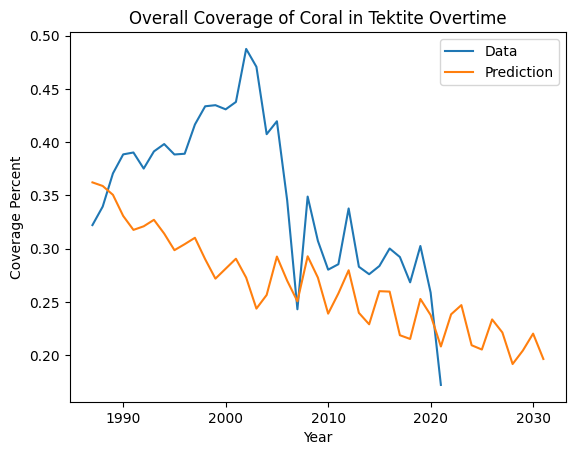

In [115]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_tektite))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_tektite_prediction))
plt.plot(new_time,avg_percent_cover_allcoral_tektite,label='Data')
plt.plot(new_time2,avg_percent_cover_allcoral_tektite_prediction,label='Prediction')
plt.title('Overall Coverage of Coral in Tektite Overtime')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()
plt.show()

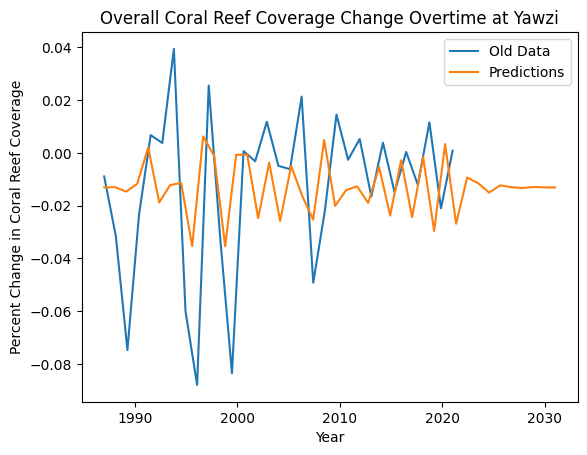

In [116]:
df_yawzi = df[df['site']=='Yawzi']
avg_percent_cover_allcoral_yawzi = df_yawzi.groupby('year_column')['percentCover_allCoral'].mean()
aic, final,std = sm_arma(avg_percent_cover_allcoral_yawzi)
z = np.diff(avg_percent_cover_allcoral_yawzi)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percent Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Yawzi')
plt.legend()
plt.show()

In [117]:
avg_percent_cover_allcoral_yawzi_prediction = np.array([np.sum(final[:i]) for i in range(len(final))])
avg_percent_cover_allcoral_yawzi_prediction += np.mean(avg_percent_cover_allcoral_yawzi.iloc[:5])
print(avg_percent_cover_allcoral_yawzi_prediction)

[ 0.38555971  0.37246817  0.35944836  0.34474639  0.33298091  0.33501673
  0.3162277   0.30397839  0.29259392  0.25723772  0.26344368  0.26222808
  0.2268333   0.2260619   0.2253486   0.20061226  0.1968574   0.1710331
  0.16607613  0.14979324  0.12447441  0.12930944  0.10919155  0.09508222
  0.08237367  0.06340405  0.05799597  0.03422338  0.03143972  0.00708826
  0.00549574 -0.02409857 -0.02078671 -0.04766335 -0.05700943 -0.06851678
 -0.08360924 -0.09593488 -0.10893062 -0.12229362 -0.13524803 -0.14834663]


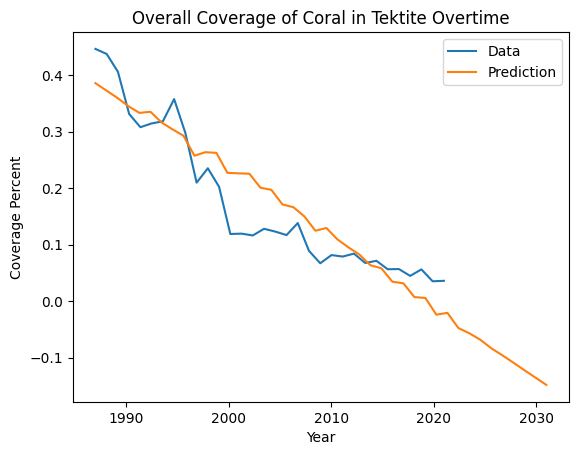

In [118]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_yawzi))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_yawzi_prediction))
plt.plot(new_time,avg_percent_cover_allcoral_yawzi,label='Data')
plt.plot(new_time2,avg_percent_cover_allcoral_yawzi_prediction,label='Prediction')
plt.title('Overall Coverage of Coral in Tektite Overtime')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()
plt.show()

Unmixture model, spacial relation, VARMAX

We also want to look at how ocean temperature affects the growth and loss of coral reefs. We observe an additional dataset recording the temperatures of the ocean in the U.S. Virgin Islands.

In [30]:
df_temp = pd.read_csv("seawatertemp.csv", index_col="Date")
df_temp.index = pd.to_datetime(df_temp.index)

In [31]:
# drop rows with no data in the temperature column and convert temperature values from strings to floats
df_temp["Temperature"] = df_temp[df_temp["Temperature"]!= 'nd']["Temperature"].astype(float)

# see which sites we have the temperature for
set(df_temp["Site"])

{'Tektite_14m', 'Yawzi_9m', 'Yawzi_NPS'}

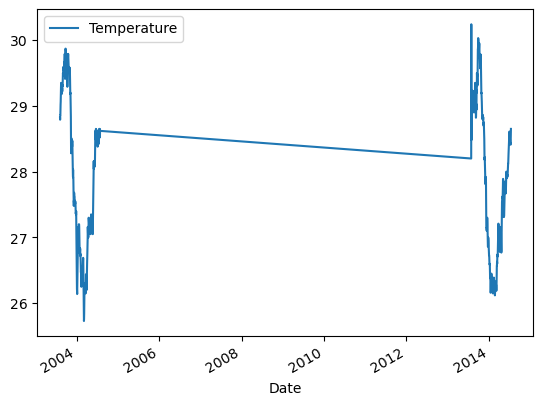

In [33]:
# plot temperature over time in Tektite area
df_temp[df_temp["Site"] == "Tektite_14m"].plot(y = "Temperature")
plt.show()

Note that the above site does not have as much data, which we will need to address.

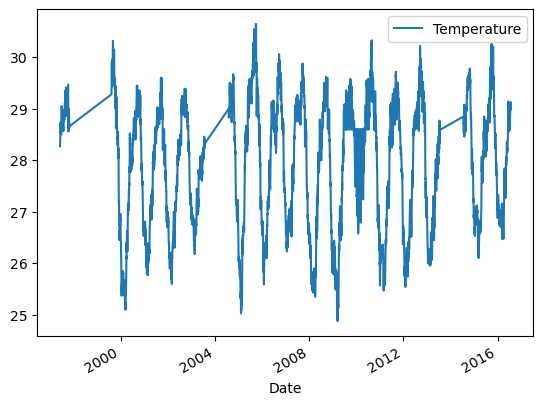

In [34]:
# plot temperature over time in Yawzi area
df_temp[df_temp["Site"] == "Yawzi_9m"].plot(y = "Temperature")
plt.show()